# IMPORT LIBRARIES AND DATASETS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# EXPLORE DATASET

In [2]:
tweet_df = pd.read_csv("twitter.csv", dtype={'tweet':'string'})

In [3]:
tweet_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  string
dtypes: int64(2), string(1)
memory usage: 749.2 KB


In [5]:
tweet_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [6]:
tweet_df.drop(['id'], axis = 1, inplace = True)
tweet_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

<AxesSubplot:>

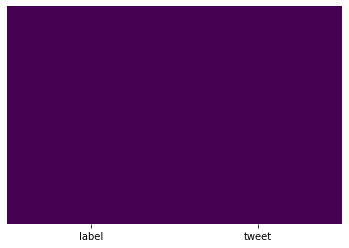

In [7]:
sns.heatmap(tweet_df.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

<AxesSubplot:xlabel='label', ylabel='count'>

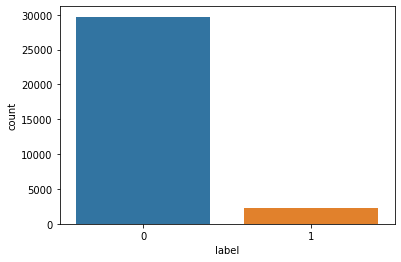

In [8]:
sns.countplot(x = "label", label = 'Count', data = tweet_df)

In [9]:
tweet_df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [10]:
tweet_df["length"] = tweet_df['tweet'].apply(len)
tweet_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

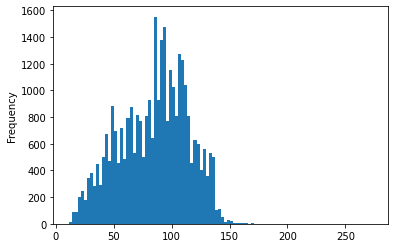

In [11]:
tweet_df["length"].plot(bins = 100, kind = "hist")

In [12]:
tweet_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [13]:
tweet_df[tweet_df['length']==11]['tweet'].iloc[0]  # The message with small length 

'i love you '

In [14]:
tweet_df[tweet_df['length']==85]['tweet'].iloc[0] # The message with mean length 

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

In [15]:
tweet_df['tweet'] = tweet_df['tweet'].str.replace("[^a-zA-Z#]", " ")

# Plotting the WordCloud

In [16]:
positive = tweet_df[tweet_df["label"]==0]
positive

label                                              tweet  length
0          0    user when a father is dysfunctional and is s...     102
1          0   user  user thanks for #lyft credit i can t us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide  society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow  user carnt wait first ti...      61
31957      0  ate  user isz that youuu                      ...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you  user for you follow        32

[29720 rows x 3 columns]

In [17]:
negative = tweet_df[tweet_df["label"]==1]
negative

label                                              tweet  length
13         1   user #cnn calls #michigan middle school  buil...      74
14         1  no comment   in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree        22
23         1     user  user lumpy says i am a   prove it lumpy       47
34         1  it s unbelievable that in the   st century we ...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall   user  #jcpenn...      59
31946      1   user omfg i m offended  i m a  mailbox and i ...      82
31947      1   user  user you don t have the balls to hashta...     112
31948      1   makes you ask yourself  who am i  then am i a...      87
31960      1   user #sikh #temple vandalised in in #calgary ...      67

[2242 rows x 3 columns]

In [18]:
sen = tweet_df["tweet"].tolist()
sen

['  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run',
 ' user  user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked',
 '  bihday your majesty',
 '#model   i love u take with u all the time in ur                                      ',
 ' factsguide  society now    #motivation',
 '      huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo  ',
 '  user camping tomorrow  user  user  user  user  user  user  user danny   ',
 'the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girl',
 'we won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers      ',
 '  user  user welcome here    i m   it s so #gr    ',
 '     #ireland consumer price index  mom  climbed from previous      to      in may   #blog #silver #gold #fo

In [19]:
len(sen)

31962

In [20]:
sen_as_one = "".join(sen)
sen_as_one

'  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run user  user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  bihday your majesty#model   i love u take with u all the time in ur                                       factsguide  society now    #motivation      huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo    user camping tomorrow  user  user  user  user  user  user  user danny   the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girlwe won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers        user  user welcome here    i m   it s so #gr         #ireland consumer price index  mom  climbed from previous      to      in may   #blog #silver #gold #forexwe are so selfish  #orlando #standwithorlando #p

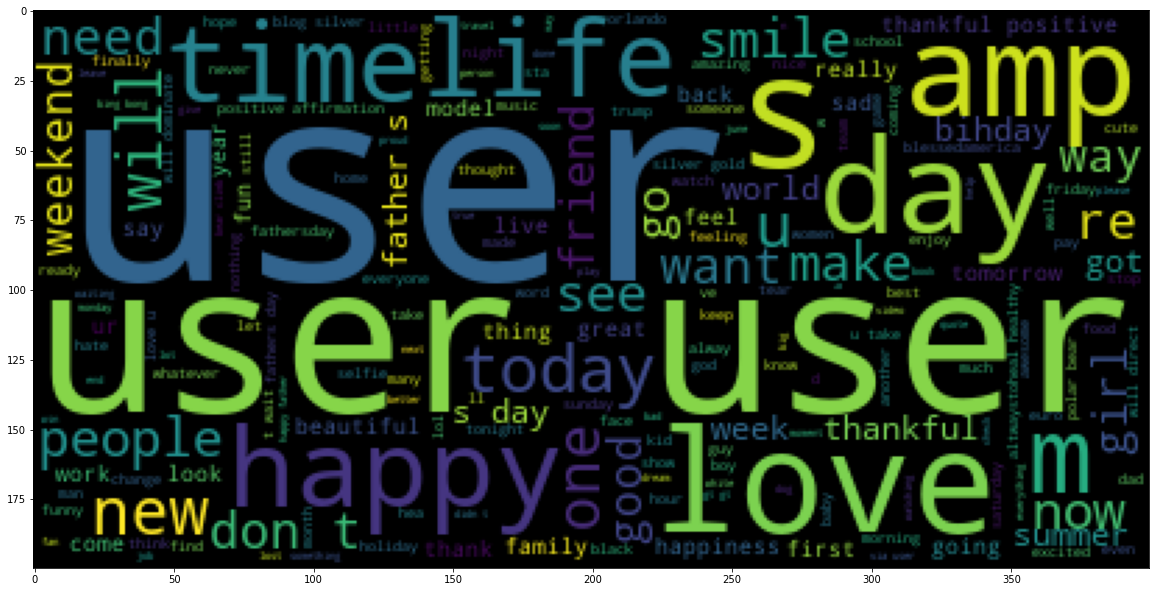

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sen_as_one));

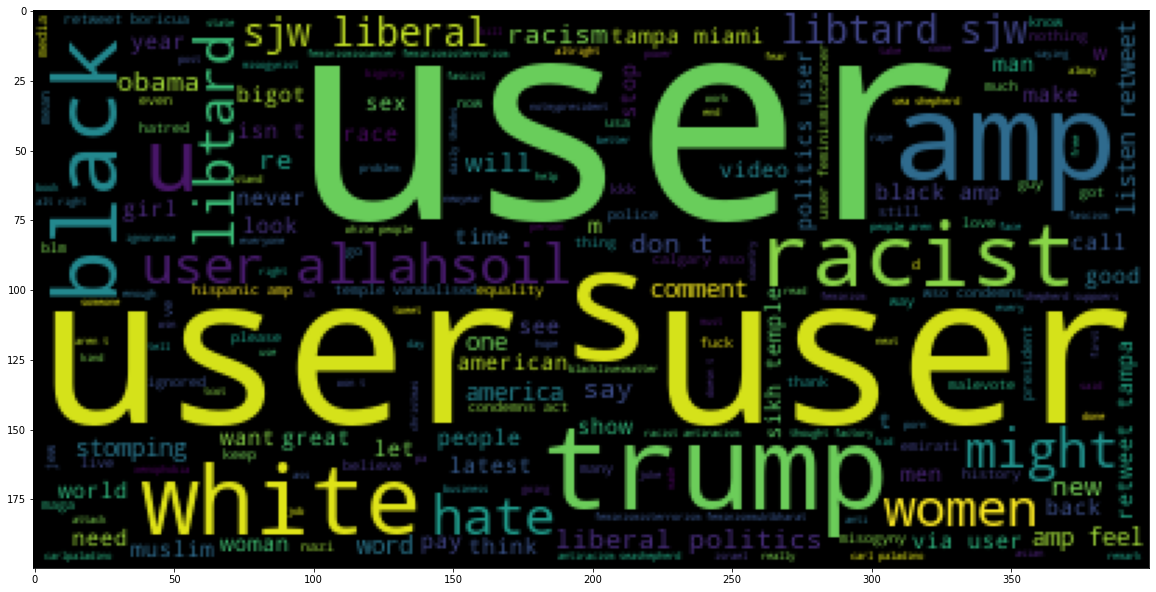

In [22]:
n = negative['tweet'].tolist()
neg_as_one = ''.join(n)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_as_one));

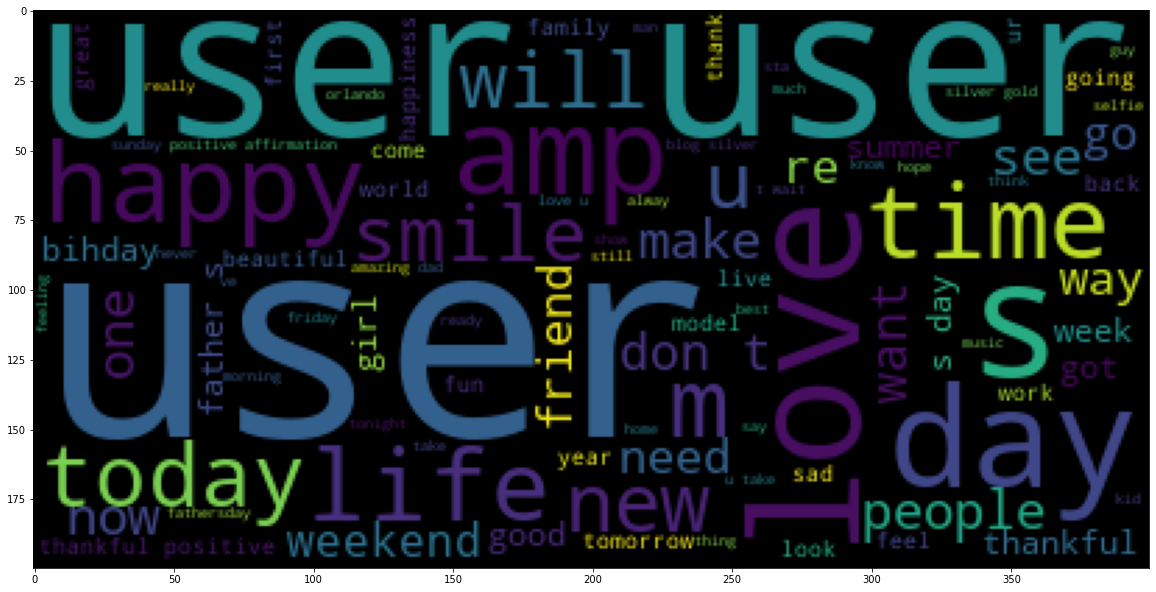

In [23]:
p = positive['tweet'].tolist()
pos_as_one = ''.join(p)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_as_one));

# DATA CLEANING

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Making a pipeline to remove punctuations, stopwords and perform Count Vectorization

In [27]:
def message_cleaning(message):
    Test_punc_removed = [c for c in message if c not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [w for w in Test_punc_removed_join.split() if w.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [28]:
tweet_df_clean = tweet_df['tweet'].apply(message_cleaning)

In [29]:
print(tweet_df_clean[5]) #New One

['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [30]:
print(tweet_df['tweet'][5]) #Old One

      huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo  


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweet_df['tweet'])

In [32]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aalivyahsimon', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aande', 'aap', 'aapi', 'aaptards', 'aarakshan', 'aarhus', 'aaron', 'aaronorentas', 'aaronrhodes', 'aarya', 'aaryn', 'aascf', 'aayat', 'ab', 'aba', 'abandoned', 'abandons', 'abantu', 'abasel', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abc', 'abcdiscovers', 'abd', 'abdominal', 'abducted', 'abe', 'abeed', 'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth', 'abetting', 'abg', 'abglp', 'abhi', 'abhishek', 'abi', 'abiding', 'abilities', 'ability', 'abitur', 'abject', 'abk', 'able', 'ableg', 'ableism', 'ablonde', 'abndp', 'abo', 'aboed', 'aboion', 'abomination', 'abou', 'aboutlastnight', 'aboutmynextmove', 'abouttime', 'abpoli', 'abraham', 'abrahamhicks', 'abrandnewday', 'abrazo', 'abricotines', 'abroad', 'abs',

In [33]:
print(tweets_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
tweets_countvectorizer.shape

(31962, 37646)

In [35]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

In [36]:
X = tweets

In [37]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  37636  37637  37638  37639  37640  37641  37642  37643  37644  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       37645  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 37646 columns]

In [38]:
y = tweet_df['label']

In [39]:
X.shape

(31962, 37646)

In [40]:
y.shape

(31962,)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training a naive bayes classifier model

In [42]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

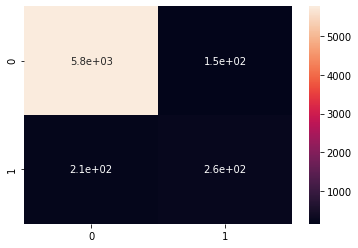

In [43]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5921
           1       0.63      0.55      0.59       472

    accuracy                           0.94      6393
   macro avg       0.80      0.76      0.78      6393
weighted avg       0.94      0.94      0.94      6393

